In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from autorocks.viz import plots_setup
import torch
import gpytorch
import botorch.posteriors
from botorch import models
from botorch.optim import fit
import torch
import numpy as np
import pandas as pd
import botorch
import daft

output_location = "/Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/Background/Figures/"
plt.style.use("ggplot")
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.set_context("paper")  # , font_scale=1.5, rc={"lines.linewidth": 1.5})
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.family"] = "Arial"
plt.rc("text", usetex=False)
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
plt.rc("axes", labelsize="large")
plt.rc("pdf", use14corefonts=True)



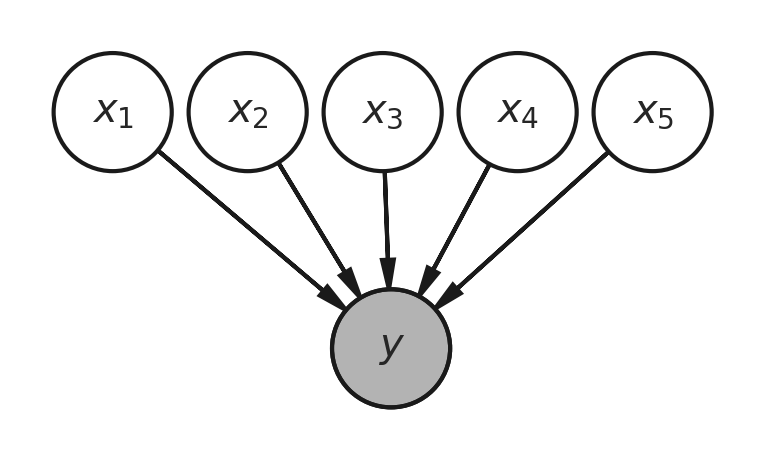

In [79]:
# Instantiate the PGM.
pgm = daft.PGM()

pgm.add_node("y", r"$y$", 1.75, 0, observed=True)
for i in [1, 2, 3, 4, 5]: 
    pgm.add_node(f"x{i}", rf"$x_{i}$", i/1.75, 1)
    pgm.add_edge(f"x{i}", "y")


# Render and save.
output_format = "pdf"

pgm.render(dpi=300).figure.savefig(f"{output_location}/pgm_full.{output_format}", bbox_inches="tight", format=f"{output_format}", dpi=300)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


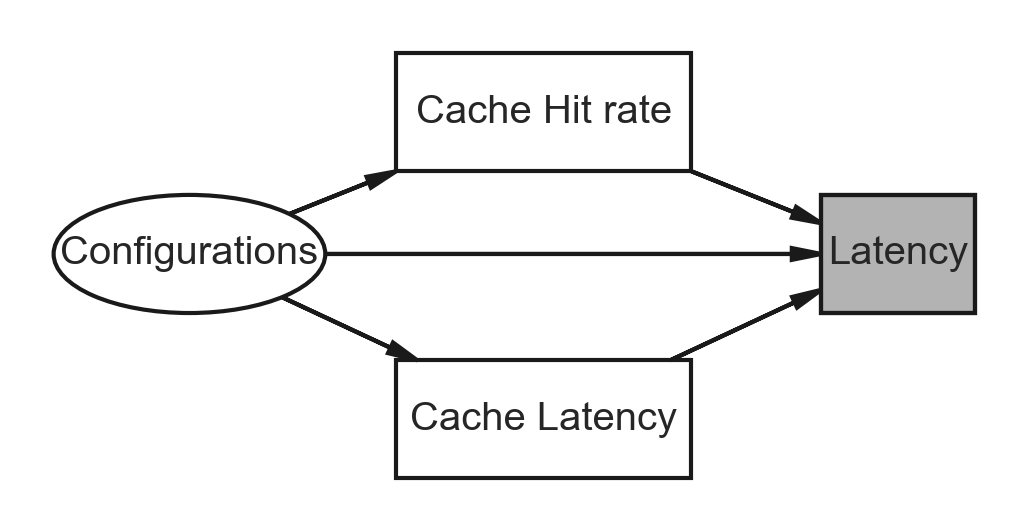

In [39]:
# Instantiate the PGM.
pgm = daft.PGM()

pgm.add_node("y", r"Latency", 3, 0.2, observed=True, shape = "rectangle", aspect = 1.3)
pgm.add_node("X", r"Configurations", 0, 0.2, aspect = 2.3)
pgm.add_node("C", r"Cache Latency", 1.5, -0.5   , shape = "rectangle", aspect = 2.5)
pgm.add_node("HIT", r"Cache Hit rate", 1.5, 0.8, shape = "rectangle", aspect = 2.5)
pgm.add_edge("C", "y")
pgm.add_edge("HIT", "y")
pgm.add_edge("X", "HIT")
pgm.add_edge("X", "C")
pgm.add_edge("X", "y")

# Render and save.
output_format = "pdf"
pgm.render(dpi=300).figure.savefig(f"{output_location}/boat_pgm.{output_format}", bbox_inches="tight", format=f"{output_format}", dpi=300)

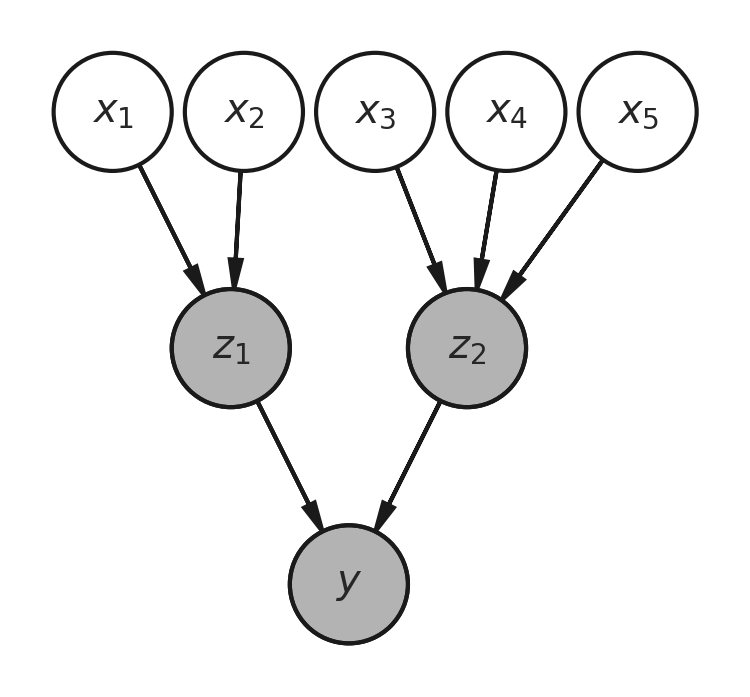

In [138]:
# Instantiate the PGM.
pgm = daft.PGM()

pgm.add_node("y", r"$y$", 1, 0, observed=True)
for i in [1, 2]:
    if i == 1:
       pgm.add_node(f"z{i}", rf"$z_{i}$", 0.5, 1, observed = True)
    else:
        pgm.add_node(f"z{i}", rf"$z_{i}$", 1.5, 1, observed = True)
    pgm.add_edge(f"z{i}", "y")

for i in [1, 2, 3, 4, 5]: 
    if i in {1, 2}:
        pgm.add_node(f"x{i}", rf"$x_{i}$", (i-1)/1.8, 2)
        pgm.add_edge(f"x{i}", "z1")
    else:
        pgm.add_node(f"x{i}", rf"$x_{i}$", (i-1)/1.8, 2)
        pgm.add_edge(f"x{i}", "z2")


# Render and save.
output_format = "pdf"

pgm.render(dpi=300).figure.savefig(f"{output_location}/pgm_deco.{output_format}", bbox_inches="tight", format=f"{output_format}", dpi=300)